<a href="https://colab.research.google.com/github/Luis-Amagua/Visualizacion_datos_Python/blob/main/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/CIENCIA DE DATOS/Datapath/Visualizacion de datos')


# Visualización de series de tiempo

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme() # para dar tema a los graficos

In [4]:
os.listdir()

['requirements-colab.txt', 'data']

In [67]:
tdf=pd.read_csv('./data/m3/tseries-data.csv',delimiter=';', encoding='iso-8859-1') #utf8 tiene problemas por las tildes y se cambia el encoding
tdf.head()

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,3.158421e+10,3.329320e+10,3.473300e+10,52544000117,72436777342,52438647922,...,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.575310e+11,6.436290e+11,5.248200e+11,4.519320e+11,3.892880e+11
1,Bolivia,BOL,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.017003e+09,1.095623e+09,1.257616e+09,1262968516,2100249875,2404697651,...,2.396303e+10,2.708450e+10,3.065934e+10,3.299619e+10,3.300020e+10,3.394113e+10,3.750864e+10,4.028765e+10,4.089532e+10,3.657276e+10
2,Chile,CHL,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,9.126310e+09,1.088411e+10,1.185382e+10,16836261173,16210404184,7622217352,...,2.522520e+11,2.671220e+11,2.783840e+11,2.605420e+11,2.439190e+11,2.504400e+11,2.770350e+11,2.975720e+11,2.793850e+11,2.529400e+11
3,Colombia,COL,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,7.198360e+09,7.820381e+09,8.671359e+09,10315760000,12370029584,13098633902,...,3.349440e+11,3.709210e+11,3.821160e+11,3.811120e+11,2.934820e+11,2.828250e+11,3.118840e+11,3.341980e+11,3.234300e+11,2.714380e+11
4,Ecuador,ECU,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2.862504e+09,2.754220e+09,3.185987e+09,3891755552,6599259421,7731677257,...,7.927666e+10,8.792454e+10,9.512966e+10,1.017260e+11,9.929038e+10,9.993770e+10,1.042960e+11,1.075620e+11,1.081080e+11,9.880801e+10


In [68]:
# para conocer todos los paises en el df
tdf['country_name'].unique() #Perú tiene tilde por eso no funcionana utf-8

array(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'México',
       'Perú', 'Paraguay'], dtype=object)

In [69]:
# se va a transponer para poder realizar las graficas orrectamente
cols=['country_code','indicator_name','indicator_code']

tmp_tdf=tdf.drop(columns=cols).copy() # drop elimina las columnas, copy no reemplaza el data frame original

In [70]:
tmp_tdf=tmp_tdf.transpose() # nombres de la svariables no son correctos y se debe corregir

In [71]:
tmp_tdf=tmp_tdf.reset_index() # sube las columnas a los indices
tmp_tdf.head()
# la primera fila muestra los paises pero se quiere que esten esos como nombre de variables

,index,0,1,2,3,4,5,6,7
0,country_name,Argentina,Bolivia,Chile,Colombia,Ecuador,México,Perú,Paraguay
1,1970,31584210366.0,1017003367.0,9126309735.0,7198360460.0,2862504170.0,35520000000.0,7432223177.0,594611111.1
2,1971,33293199095.0,1095622896.0,10884114754.0,7820380971.0,2754220263.0,39200000000.0,8289582884.0,664571428.6
3,1972,34733000536.0,1257615645.0,11853817308.0,8671358733.0,3185987235.0,45200000000.0,9189413409.0,769039682.5
4,1973,52544000117,1262968516,16836261173,10315760000,3891755552,55280000000,10994381895,995531746


In [72]:
c_names=list(tmp_tdf.iloc[0,:])[1:] # lo ultimo es para seleccionar solo desde los paises y no "country_name"
c_names

['Argentina',
 'Bolivia',
 'Chile',
 'Colombia',
 'Ecuador',
 'México',
 'Perú',
 'Paraguay']

In [73]:
c_names.insert(0, 'year') # ingreso en la posicion cero d ela lista el nombre year
c_names

['year',
 'Argentina',
 'Bolivia',
 'Chile',
 'Colombia',
 'Ecuador',
 'México',
 'Perú',
 'Paraguay']

In [75]:
# se agregan los nombres al dataframe
tmp_tdf=tmp_tdf.iloc[1:,:]
tmp_tdf.head()

,index,0,1,2,3,4,5,6,7
1,1970,31584210366.0,1017003367.0,9126309735.0,7198360460.0,2862504170.0,35520000000.0,7432223177.0,594611111.1
2,1971,33293199095.0,1095622896.0,10884114754.0,7820380971.0,2754220263.0,39200000000.0,8289582884.0,664571428.6
3,1972,34733000536.0,1257615645.0,11853817308.0,8671358733.0,3185987235.0,45200000000.0,9189413409.0,769039682.5
4,1973,52544000117,1262968516,16836261173,10315760000,3891755552,55280000000,10994381895,995531746
5,1974,72436777342,2100249875,16210404184,12370029584,6599259421,72000000000,13858441211,1333475397


In [78]:
# se cambian ls nombres de las columnas
tmp_tdf.columns=c_names
tmp_tdf.head()

,year,Argentina,Bolivia,Chile,Colombia,Ecuador,México,Perú,Paraguay
1,1970,31584210366.0,1017003367.0,9126309735.0,7198360460.0,2862504170.0,35520000000.0,7432223177.0,594611111.1
2,1971,33293199095.0,1095622896.0,10884114754.0,7820380971.0,2754220263.0,39200000000.0,8289582884.0,664571428.6
3,1972,34733000536.0,1257615645.0,11853817308.0,8671358733.0,3185987235.0,45200000000.0,9189413409.0,769039682.5
4,1973,52544000117,1262968516,16836261173,10315760000,3891755552,55280000000,10994381895,995531746
5,1974,72436777342,2100249875,16210404184,12370029584,6599259421,72000000000,13858441211,1333475397


In [80]:
tmp_tdf.shape

(51, 9)

In [83]:
tmp_tdf.set_index('year').head() # el año se pasó como index y servirá para graficar

,Argentina,Bolivia,Chile,Colombia,Ecuador,México,Perú,Paraguay
year,,,,,,,,
1970,31584210366.0,1017003367.0,9126309735.0,7198360460.0,2862504170.0,35520000000.0,7432223177.0,594611111.1
1971,33293199095.0,1095622896.0,10884114754.0,7820380971.0,2754220263.0,39200000000.0,8289582884.0,664571428.6
1972,34733000536.0,1257615645.0,11853817308.0,8671358733.0,3185987235.0,45200000000.0,9189413409.0,769039682.5
1973,52544000117,1262968516,16836261173,10315760000,3891755552,55280000000,10994381895,995531746
1974,72436777342,2100249875,16210404184,12370029584,6599259421,72000000000,13858441211,1333475397


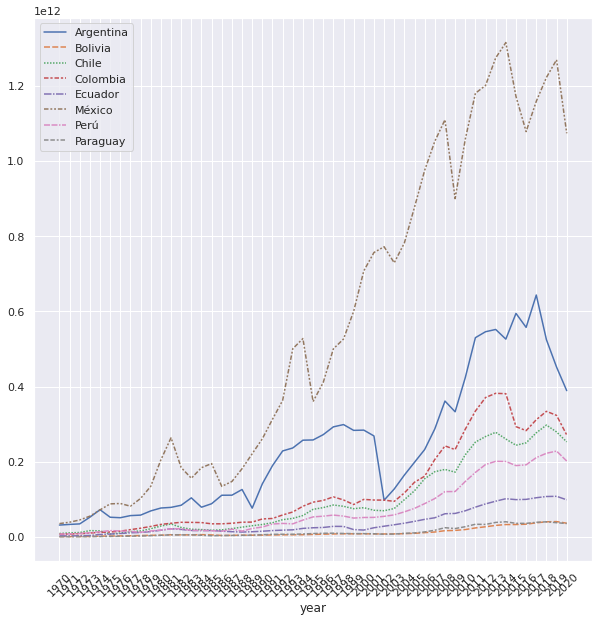

In [86]:
# para graficar
plt.figure(figsize=(10,10))
sns.lineplot(data=tmp_tdf.set_index('year'))
plt.xticks(rotation=45) # etiquetas
plt.show()

In [89]:
mex_df=tmp_tdf[['year','México']]
mex_df.head()

,year,México
1,1970,35520000000.0
2,1971,39200000000.0
3,1972,45200000000.0
4,1973,55280000000
5,1974,72000000000


In [92]:
mex_df['mmovil']=mex_df['México'].rolling(window=6).mean() # media movil

<ipython-input-92-2a4695cb27d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mex_df['mmovil']=mex_df['México'].rolling(window=6).mean()


In [95]:
mex_df.head(7)

,year,México,mmovil
1,1970,35520000000.0,NaN
2,1971,39200000000.0,NaN
3,1972,45200000000.0,NaN
4,1973,55280000000,NaN
5,1974,72000000000,NaN
6,1975,88000000000,5.586667e+10
7,1976,89025974026,6.478433e+10


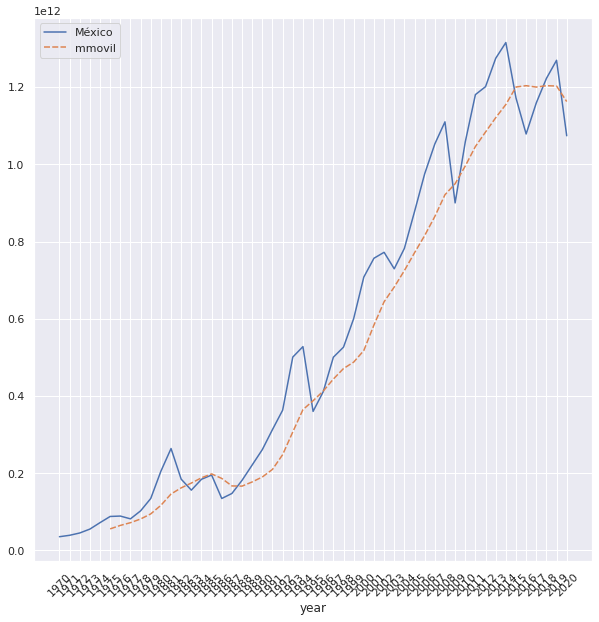

In [96]:
# para graficar
plt.figure(figsize=(10,10))
sns.lineplot(data= mex_df.set_index('year'))
plt.xticks(rotation=45) # etiquetas
plt.show()

# Visualizacion de datos de panel

In [98]:
pdf=pd.read_csv('./data/m3/panel-data.csv',sep=';', encoding='iso-8859-1')
pdf.head()


,YEAR,ID,PAIS,CODPAIS,PBI_USD,ESP_VIDA,POBLACION
0,1970,1,Perú,PER,7.432223e+09,54.174,13459789
1,1971,1,Perú,PER,8.289583e+09,54.935,13836365
2,1972,1,Perú,PER,9.189413e+09,55.671,14221954
3,1973,1,Perú,PER,1.099438e+10,56.360,14615847
4,1974,1,Perú,PER,1.385844e+10,56.994,15017060


In [101]:
pdf['PAIS'].unique()

array(['Perú', 'Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador',
       'México', 'Paraguay'], dtype=object)

In [102]:
pdf.groupby(by='PAIS')['YEAR'].count()

PAIS
Argentina    51
Bolivia      51
Chile        51
Colombia     51
Ecuador      51
México       51
Paraguay     51
Perú         51
Name: YEAR, dtype: int64

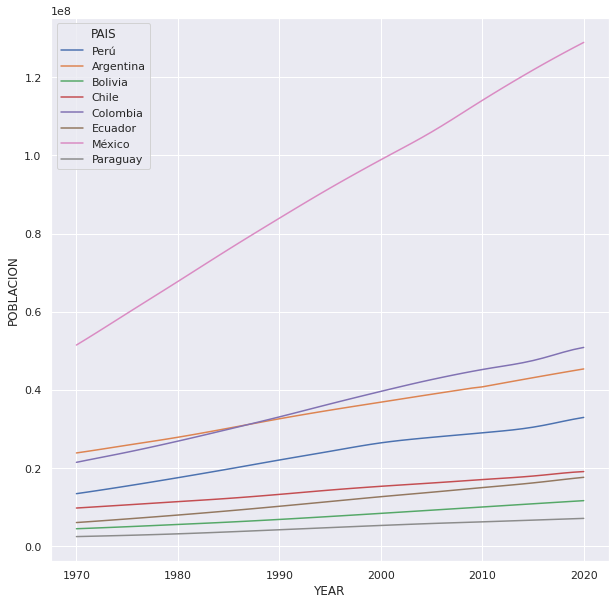

In [105]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pdf, x='YEAR',y='POBLACION',hue='PAIS')
plt.show()

In [109]:
aux1_pdf=pdf.copy()
aux1_pdf['PBI_PC']=aux1_pdf['PBI_USD']/aux1_pdf['POBLACION']
aux1_pdf.head()

,YEAR,ID,PAIS,CODPAIS,PBI_USD,ESP_VIDA,POBLACION,PBI_PC
0,1970,1,Perú,PER,7.432223e+09,54.174,13459789,552.179769
1,1971,1,Perú,PER,8.289583e+09,54.935,13836365,599.115655
2,1972,1,Perú,PER,9.189413e+09,55.671,14221954,646.142816
3,1973,1,Perú,PER,1.099438e+10,56.360,14615847,752.223384
4,1974,1,Perú,PER,1.385844e+10,56.994,15017060,922.846497


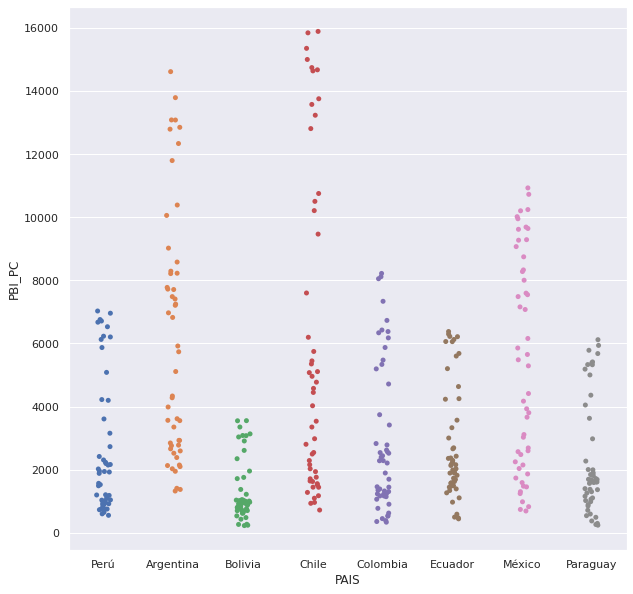

In [111]:
plt.figure(figsize=(10,10))
sns.stripplot(data=aux1_pdf, x='PAIS',y='PBI_PC')
plt.show()

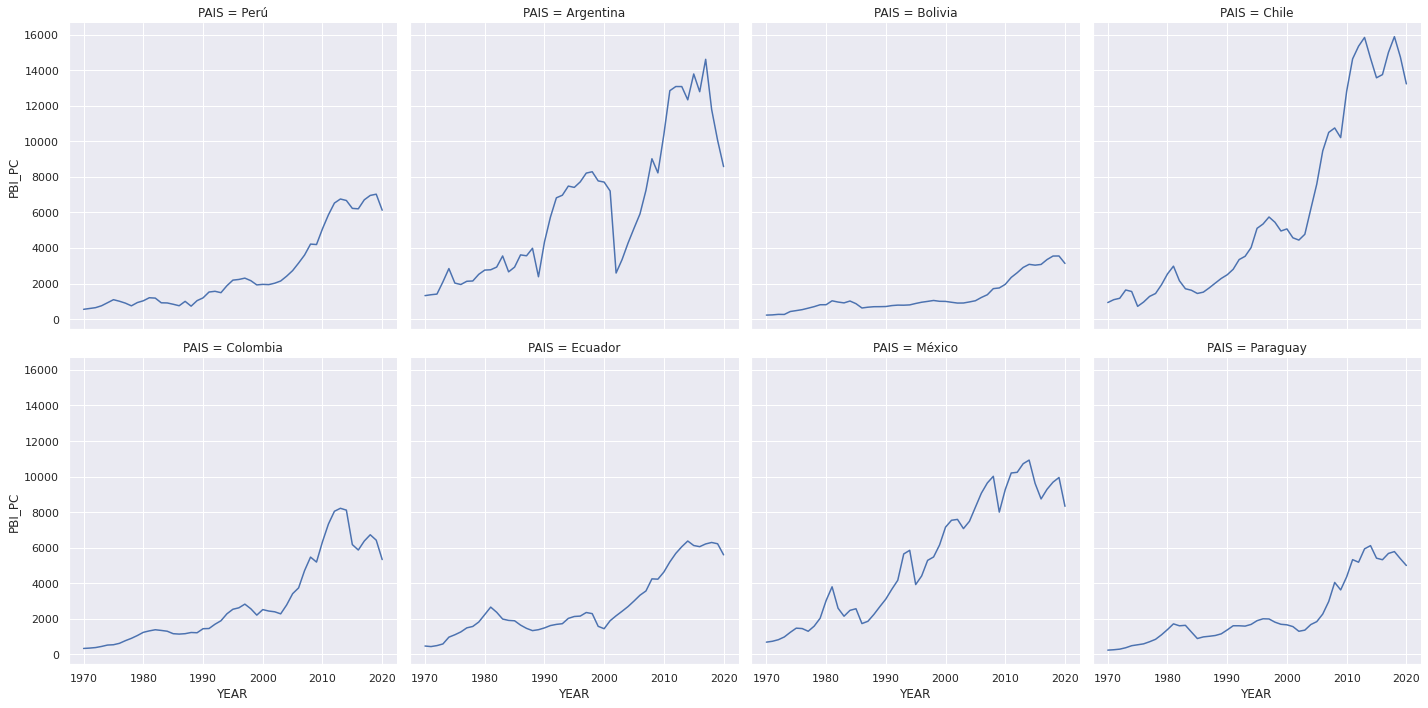

In [115]:
sns.relplot(data=aux1_pdf, x='YEAR', y='PBI_PC',kind='line',col='PAIS',col_wrap=4)
plt.show()

NameError: ignored

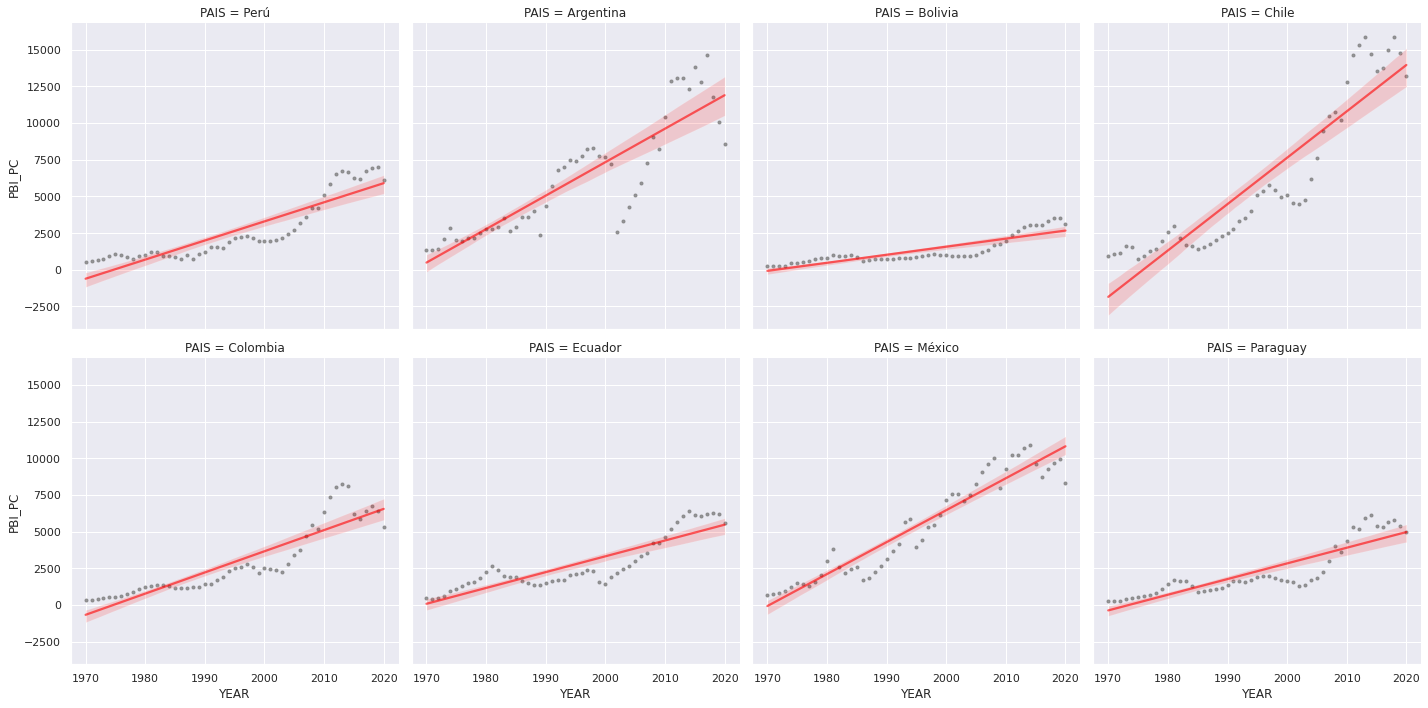

In [127]:
scatter_kws={'color':'grey'}
line_kws={'color':'red', 'alpha':0.6}
sns.lmplot(data=aux1_pdf, x='YEAR', y='PBI_PC', col='PAIS',col_wrap=4, markers='.',scatter_kws=scatter_kws, line_kws=line_kws)

plot.show()